# Homework no: 5
### Name : ANGGARA PUTRA PRATAMA - 1101174240 
github.com/anggaraputrapratama

In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from math import sqrt

In [42]:
data = np.loadtxt("1.csv", delimiter=',', skiprows=0, usecols=range(1,5),dtype=(int))
data = np.delete(data, (-1), axis=0)
data

array([[1502, 2215, 2153,    1],
       [1667, 2072, 2047,    1],
       [1611, 1957, 1906,    1],
       ...,
       [1930, 2383, 2074,    7],
       [1929, 2385, 2076,    7],
       [1926, 2385, 2078,    7]])

In [44]:
np.set_printoptions(precision=3, suppress=True)
df = pd.DataFrame(data1, columns = ['x','y','z', 'label'])
df['am'] = df['x']**2+df['y']**2+df['z']**2
df['am'] = df['am'].apply(np.sqrt)
df
data = df.to_numpy()
data

array([[1502.   , 2215.   , 2153.   ,    1.   , 3434.769],
       [1667.   , 2072.   , 2047.   ,    1.   , 3355.932],
       [1611.   , 1957.   , 1906.   ,    1.   , 3171.436],
       ...,
       [1930.   , 2383.   , 2074.   ,    7.   , 3702.035],
       [1929.   , 2385.   , 2076.   ,    7.   , 3703.923],
       [1926.   , 2385.   , 2078.   ,    7.   , 3703.483]])

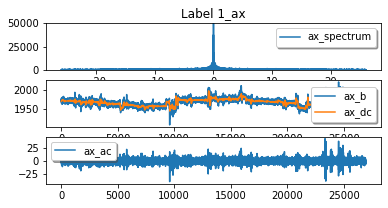

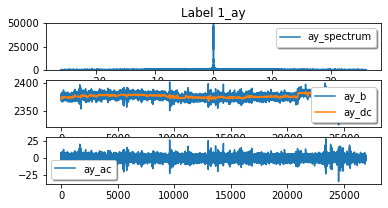

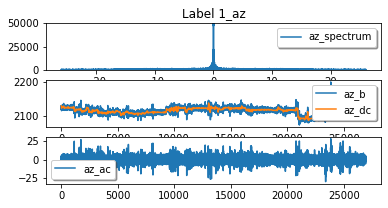

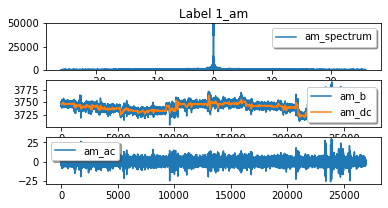

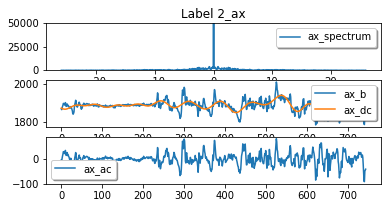

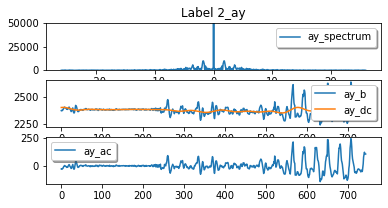

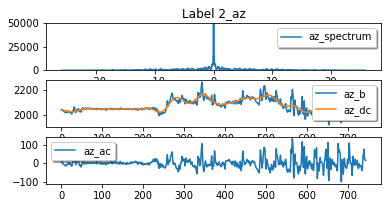

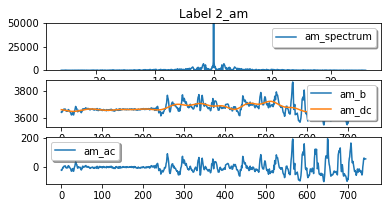

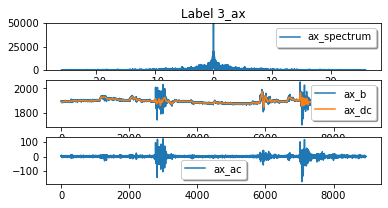

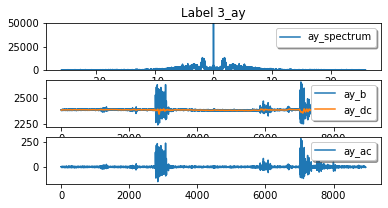

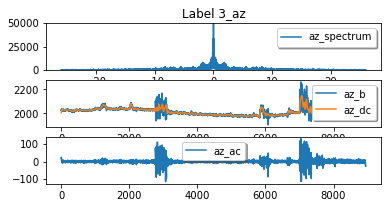

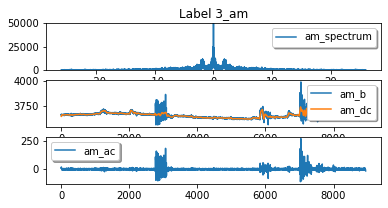

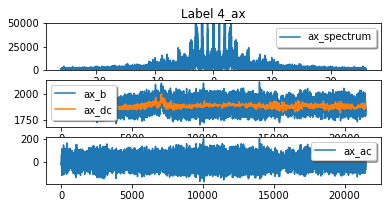

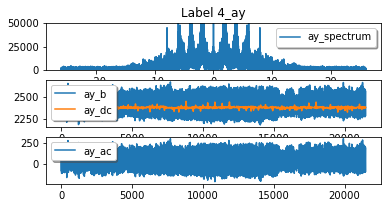

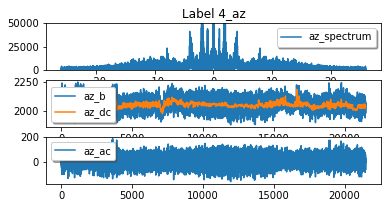

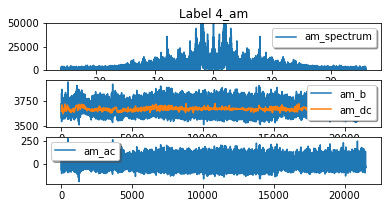

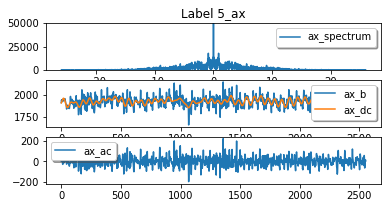

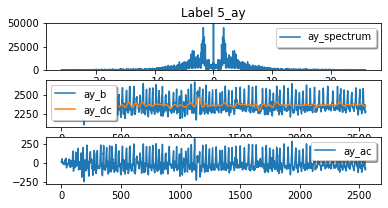

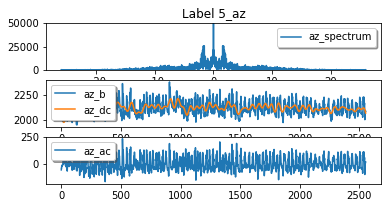

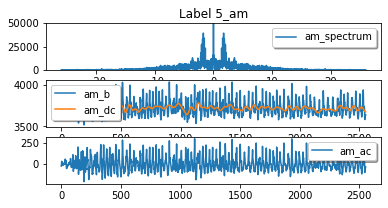

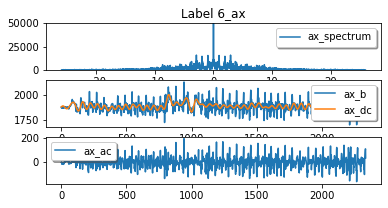

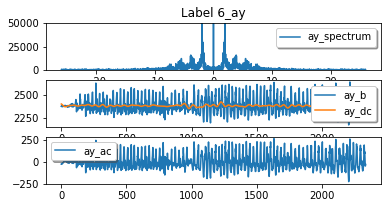

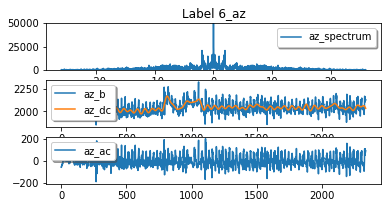

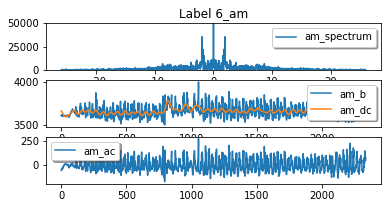

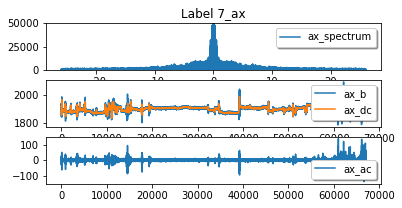

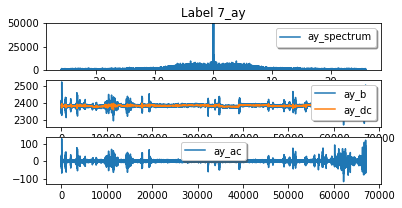

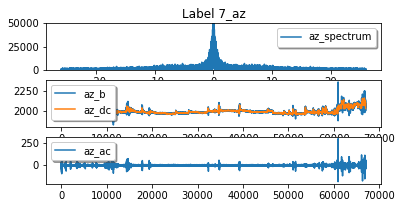

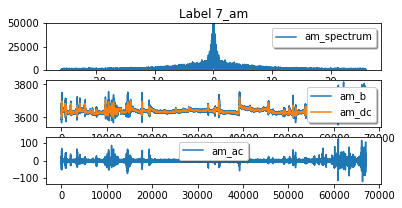

In [48]:
fs = 52
for i in range (1,8):
    mask1 = data[data[:,3]==i]
    #Given id for each label
    ax=mask1[:, 0]
    ay=mask1[:, 1]
    az=mask1[:, 2]
    am=mask1[:, 4]
    axis_label = (ax,ay,az,am)
    axis1_label = ('ax','ay','az','am')
    #Assign label
    label_list = []
    headerList = ['no','x', 'y', 'z', 'Activity']
    for j,k in zip(axis_label, axis1_label) :
        
        
        
        
        
        #Cut off 10% from two ends
        n = len(j)
        
        #Use int to define cut off
        cut_len = int(n*0.1)
        b = j[cut_len:-cut_len]
        m = b.size
        
        #Convert data into frequency domain
        freqY = np.fft.fft(b)
        freq = np.fft.fftfreq(m, d=1/fs)
        shift_freq = np.fft.fftshift(freq)
                
        #Spectrum
        spectrum = np.sqrt(freqY.real**2+freqY.imag**2)               
        shift_spec = np.fft.fftshift(spectrum)
        spec = m                   
                
        #Low pass filter
        lowPassMask = abs(freq) <=1 #Cut off 1hz
        lowPassFy = freqY.copy()
        lowPassFy[~lowPassMask] = 0 # ~, equivalent to logical_not
        dc = np.fft.ifft(lowPassFy)
        
        #High pass filter
        highPassFy = freqY.copy()
        highPassFy[lowPassMask] = 0 
        ac = np.fft.ifft(highPassFy)
        
        #Reshape b, dc, ac and append to label list 
        label_list.append(b.reshape(-1,1))
        label_list.append(dc.real.reshape(-1,1))
        label_list.append(ac.real.reshape(-1,1))
        
        #Visualize the results  
        plt.figure()
        ax1 = plt.subplot(411)
        ax2 = plt.subplot(412)
        ax3 = plt.subplot(413)
        
        ax1.set_ylim(0,50000)
        ax1.plot(shift_freq, shift_spec, label='{}_spectrum'.format(k))
        legend = ax1.legend(loc='best', shadow=True, fontsize='medium')
        ax1.set_title("Label {}_{}".format(i,k) )
        
        ax2.plot(b, label='{}_b'.format(k))
        ax2.plot(dc.real, label='{}_dc'.format(k))
        legend = ax2.legend(loc='best', shadow=True, fontsize='medium')
        
        ax3.plot(ac.real, label='{}_ac'.format(k))            
        legend = ax3.legend(loc='best', shadow=True, fontsize='medium')
        
        plt.show()